# Mitigation in the Agriculture Sector.
The idea of this trial is to simulate a scenario that predicts future temperature change if there were no greenhouse gas emissions from agriculture.
Here is the outline of the notebook:
- Temperature projections of Zero CH4 and N20 emissions between 2021- 2050
- Temperature projections of CO2 land use sequestrations between 2021- 2050
- Temperature projections of a combination of both

First, I want to explore what the regular temperature and concentration projections are like for the RCP4.5, then get to work on the codes for the climate scenario

In [1]:
# Importing all the things that I will most likely need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fair
from fair.forward import fair_scm
from fair.RCPs import rcp26, rcp45, rcp60, rcp85 

In [2]:
# run RCP4.5 with default parameters
# C- Concentration in greenhouse gases
# F- Forcing
# T- Temperature
C45, F45, T45 = fair_scm(emissions = rcp45.Emissions.emissions) 

In [3]:
rcp45.Emissions.emissions.shape

(736, 40)

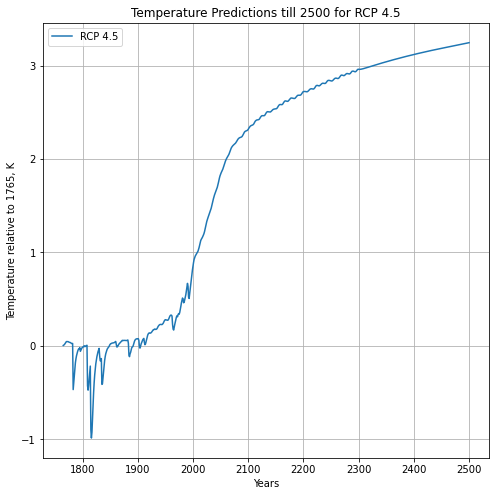

<Figure size 432x288 with 0 Axes>

In [4]:
# RCP 4.5 Temperature projections with the FAiR Model
years = np.arange(1765, 2501)
plt.figure(figsize=(8,8))
plt.plot(years, T45, label='RCP 4.5')


plt.xlabel("Years")
plt.ylabel("Temperature relative to 1765, K")
plt.legend()
plt.title("Temperature Predictions till 2500 for RCP 4.5")
 
plt.grid()
plt.show()
plt.savefig('Temperature Predictions.png') # save figure

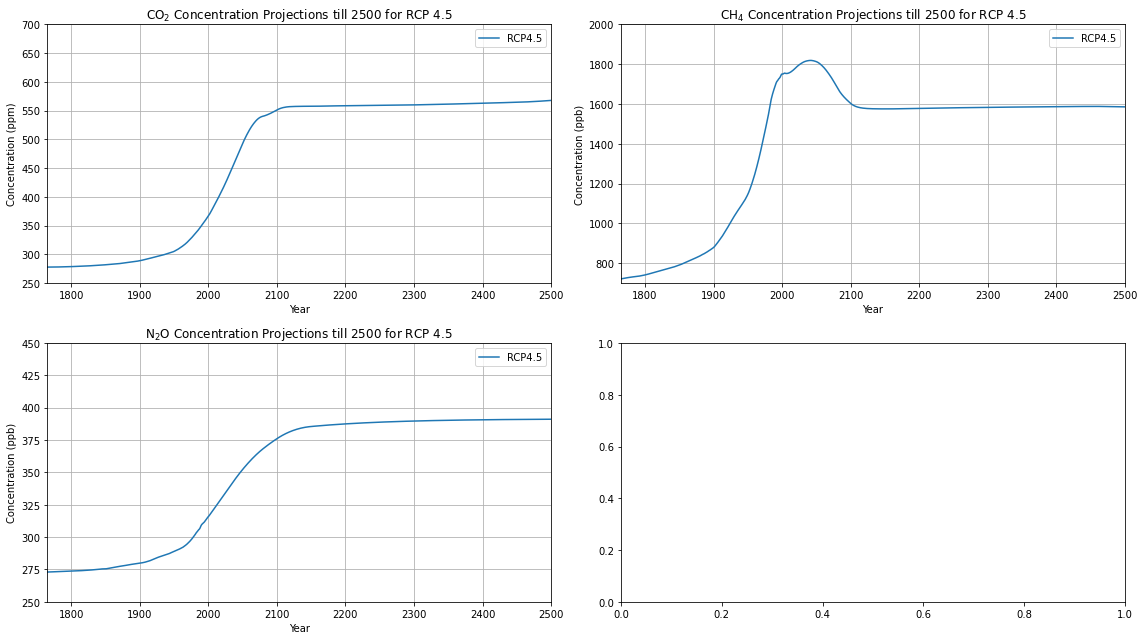

In [5]:
# Concentration projections with the FAiR Model

C45_CO2 = C45[:,0]
C45_CH4 = C45[:,1]
C45_N2O = C45[:,2]


fig, ax = plt.subplots(2, 2, figsize=(16,9))
# Do concentration plot for all RCPs
# the label keyword adds a label to each line
ax[0,0].plot(years, C45_CO2, label='RCP4.5')
ax[0,0].set_xlim(1765, 2500)
ax[0,0].set_ylim(250, 700)
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Concentration (ppm)')
ax[0,0].set_title('CO$_2$ Concentration Projections till 2500 for RCP 4.5') # sets title
ax[0,0].grid()
ax[0,0].legend()
plt.savefig('CO2_plot.png') # save figure

ax[0,1].plot(years, C45_CH4, label='RCP4.5')
ax[0,1].set_xlim(1765, 2500)
ax[0,1].set_ylim(700, 2000)
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('Concentration (ppb)')
ax[0,1].set_title('CH$_4$ Concentration Projections till 2500 for RCP 4.5') # sets title
ax[0,1].grid()
ax[0,1].legend() # creates a legend based on the line labels
plt.savefig('CH4_plot.png') # save figure


ax[1,0].plot(years, C45_N2O, label='RCP4.5')
ax[1,0].set_xlim(1765, 2500)
ax[1,0].set_ylim(250, 450)
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Concentration (ppb)')
ax[1,0].set_title('N$_2$O Concentration Projections till 2500 for RCP 4.5') # sets title
ax[1,0].grid()
ax[1,0].legend()
plt.savefig('N2O_plot.png') # save figure
plt.tight_layout() # better subplot spacing


## So Far...

I imported relevant modules, and run the concentration projections of CO2, CH4 and N2O RCP4.5 projections. The values for CO2 and N20 show a rapid increase in concentration between 2000 and 2100, after which a stabilization is observed. For CH4, the situatuon is quite different, the rapid increase is between 1900 ad 2000 and a decline is observed for the later part of 2000-2100. Next, I create the first scenario - Temperature projections of Zero CH4 and N20 emissions between 2021- 2050

## First Scenario: Temperature projections of Zero CH4 and N20 emissions between 2021- 2050
Here, I try to model Temperature projections of Zero CH$_4$ and N$_2$O agricultural emissions emissions between 2021- 2050 using excel

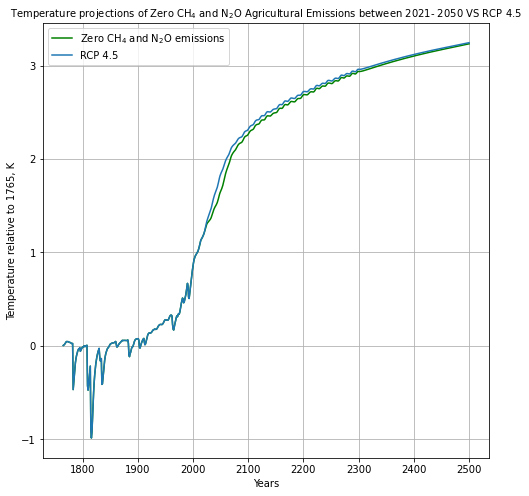

In [6]:
# Temperature projections of Zero CH4 and N20 emissions between 2021- 2050 using excel
# I basically reduced all the N20 and CH4 values from 2021 to 2050 by 75% and 42% respectively in excel
# then I saved the file, uploded it here and made it a dataframe, and then into the regualar array


df1 = pd.read_csv('Zero_CH4_and_N20_emissions_file.csv')

# Changing dataframe to regular array
Zero_CH4N2O = df1.values

# Plotting the graph for Zero CH4 and N20 emissions between 2021- 2050
Cstop, Fstop, Tstop = fair_scm(emissions = Zero_CH4N2O)


plt.figure(figsize=(8,8))
plt.plot(years, Tstop, color='g', label='Zero CH$_4$ and N$_2$O emissions') # Plots the zero emissions scenario
plt.plot(years, T45, label='RCP 4.5') # Plots the RCP 4.5
plt.legend() 

plt.xlabel("Years", fontsize=10)
plt.ylabel("Temperature relative to 1765, K", fontsize=10)
plt.title("Temperature projections of Zero CH$_4$ and N$_2$O Agricultural Emissions between 2021- 2050 VS RCP 4.5", fontsize=10)
plt.grid()
plt.savefig('Zero CH4 and N2O emissions.png')
plt.show()


## Findings...
From the graph above, if agriculture had zero CH4 and N2O emissions, it won't still be sufficient to keep the temperature at the recommended 1.5˚c as recommended by the IPCC. It only does this till around 2060, afterwhich the difference is not so much from the RCP 4.5 predictions. Next, Next, I create the second scenario - Temperature projections of CO2 land use sequesterations between 2021- 2050. 

## Second Scenario: Temperature projections of CO2 land use sequesterations between 2021- 2050
Here, I try to model temperature projections of CO$_2$ land use sequesterations between 2021- 2050 using excel. I basically change the CO$_2$ land use figures between 2021 and 2050 to negative values. I also account for a 20% reduction in CO$_2$ fossil fuel because I am assuming afforestation and other carbon sequestration methods will sequester some CO$_2$ fossil in the atmosphere. To account for this 20% reduction, I multiply the CO$_2$ fossil values between 2021 and 2050 by 0.8.

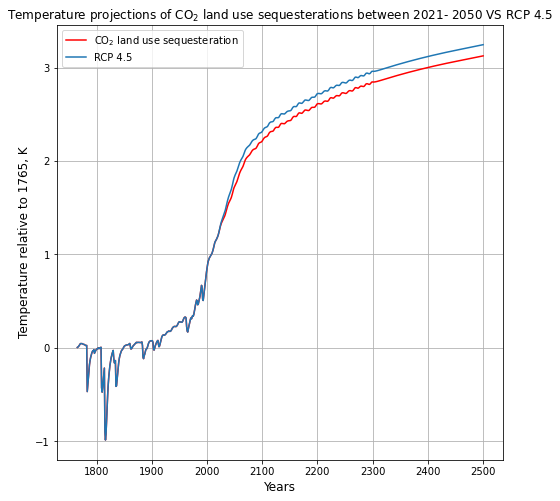

In [7]:
# Temperature projections of CO2 land use sequesterations between 2021- 2050 using excel
# I basically changed all the CO2 land usevalues from 2021 to 2050 to negative in excel by multiplying them by -1
# Then I multiplied the CO2 fossil values within the same time frame by 0.8 to account for a 20% reduction 
# then I saved the file, uploded it here and made it a dataframe, and then into the regualar array


df2 = pd.read_csv('seq_emissions_file.csv')

# Changing dataframe to regular array
CO2_seq = df2.values

# Plotting the graph for Zero CH4 and N20 emissions between 2021- 2050
Cseq, Fseq, Tseq = fair_scm(emissions = CO2_seq)


plt.figure(figsize=(8,8))
plt.plot(years, Tseq, color='r', label='CO$_2$ land use sequesteration') # Plots the sequestration scenario as explained
plt.plot(years, T45, label='RCP 4.5') # Plots the RCP 4.5
plt.legend() 

plt.xlabel("Years", fontsize=12)
plt.ylabel("Temperature relative to 1765, K", fontsize=12)
plt.title("Temperature projections of CO$_2$ land use sequesterations between 2021- 2050 VS RCP 4.5", fontsize=12)
plt.grid()
plt.savefig('seq_emissions.png')
plt.show()


# Findings..
This is hilarious. Nothing significant happend here. I will now move on to a combination of both scenarios above

## Third Scenario: AFOLU Mitigation
In this experiment AFLOU Mitigation is defined as:
- Zero emissions of CH4 and N2O
- Sequestration of CO2 land use emission 
- 20% reduction in CO2 fossil emission as an effect of carbon sequestration by eg afforestation

Basically, a combination of the two scenarios above.

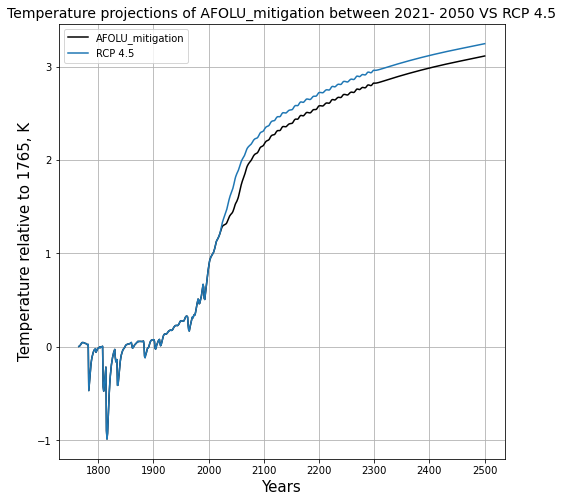

In [8]:
# Temperature projections of AFOLU mitigation between 2021- 2050 using excel
# I reduced all the N20 and CH4 values from 2021 to 2050 by by 75% and 42% respectively in excel
# Then I changed all the CO2 land use values from 2021 to 2050 to negative in excel, by multiplying them by -1
# Then I multiplied the CO2 fossil values within the same time frame by 0.8 to account for a 20% reduction 
# then I saved the file, uploded it here and made it a dataframe, and then into the regualar array


df3 = pd.read_csv('AFOLU_mitigation_emissions_file.csv')

# Changing dataframe to regular array
afolu_mit = df3.values

# Plotting the graph for Zero CH4 and N20 emissions between 2021- 2050
Cmit, Fmit, Tmit = fair_scm(emissions = afolu_mit)


plt.figure(figsize=(8,8))
plt.plot(years, Tmit, color='k', label='AFOLU_mitigation') # Plots the AFLOU_mitigation scenario as explained
plt.plot(years, T45, label='RCP 4.5') # Plots the RCP 4.5
plt.legend() 

plt.xlabel("Years", fontsize=15)
plt.ylabel("Temperature relative to 1765, K", fontsize=15)
plt.title("Temperature projections of AFOLU_mitigation between 2021- 2050 VS RCP 4.5", fontsize=14)
plt.grid()
plt.savefig('AFOLU_mitigation.png')
plt.show()


## Findings...

This is very similar to the first scenario, but i think they may be slightly different. To explore that, I will plot another graph that illustrates all three results and zoom in on them for comparison.

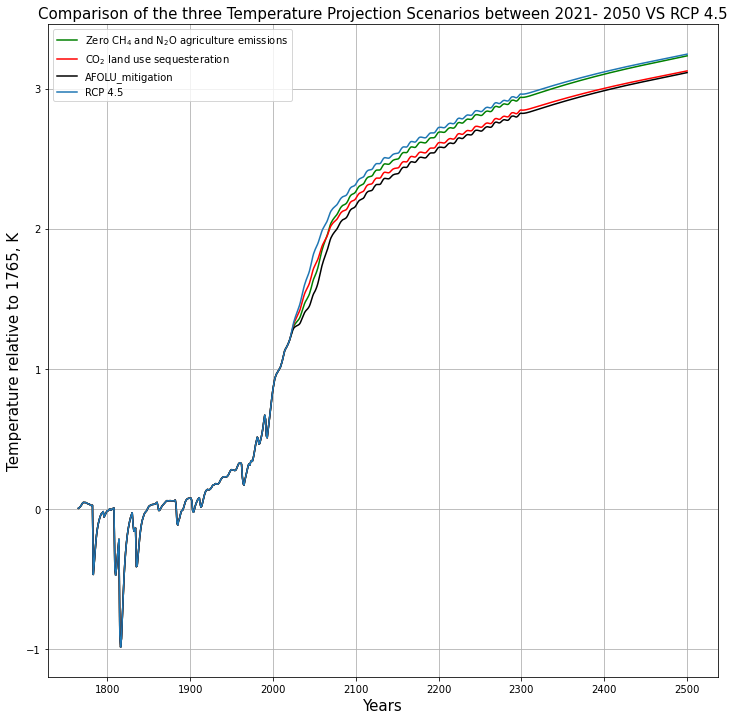

In [9]:
# Final plots
# Representation of the three plots above in one graph

plt.figure(figsize=(12,12))
plt.plot(years, Tstop, color='g', label='Zero CH$_4$ and N$_2$O agriculture emissions') # Plots the zero emissions scenario
plt.plot(years, Tseq, color='r', label='CO$_2$ land use sequesteration') # Plots the sequestration scenario as explained
plt.plot(years, Tmit, color='k', label='AFOLU_mitigation') # Plots the AFLOU_mitigation scenario as explained
plt.plot(years, T45, label='RCP 4.5') # Plots the RCP 4.5
plt.legend() 

plt.xlabel("Years", fontsize=15)
plt.ylabel("Temperature relative to 1765, K", fontsize=15)
plt.title("Comparison of the three Temperature Projection Scenarios between 2021- 2050 VS RCP 4.5", fontsize=15)
plt.grid()
plt.savefig('comparison.png')
plt.show()


# Summary
- None of the scenarios can effectively keep the global temperature within the 1.5˚c target till 2100.
- `Zero CH4 and N2O emissions` and `AFLOU_mitigation` will do so, but only till around 2060, then the temperature goes beyond the limit.